In [20]:
!pip install catboost
import numpy as np    #for mathematical operations
from catboost import Pool, CatBoostRegressor   #internal data format
import pandas as pd   #for data analysis and machine learning task
import numpy as np
import seaborn as sns    #for interactive graphs  
from sklearn.model_selection import train_test_split  #for splitting data into train and test
from sklearn.metrics import mean_squared_error  


You should consider upgrading via the 'C:\Users\raahi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [39]:
path = "ddataset_smoted_3i_5k.csv" 
air = pd.read_csv(path) #read dataset csv file
air


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Delhi,02/01/2015,186.180000,269.550000,62.090000,32.870000,88.140000,31.830000,9.540000,6.650000,29.970000,10.550000,20.090000,454.000000,Severe
1,Delhi,03/01/2015,87.180000,131.900000,25.730000,30.310000,47.950000,69.550000,10.610000,2.650000,19.710000,3.910000,10.230000,143.000000,Moderate
2,Delhi,04/01/2015,151.840000,241.840000,25.010000,36.910000,48.620000,130.360000,11.540000,4.630000,25.360000,4.260000,9.710000,319.000000,'Very Poor'
3,Delhi,05/01/2015,146.600000,219.130000,14.010000,34.920000,38.250000,122.880000,9.200000,3.330000,23.200000,2.800000,6.210000,325.000000,'Very Poor'
4,Delhi,06/01/2015,149.580000,252.100000,17.210000,37.840000,42.460000,134.970000,9.440000,3.660000,26.830000,3.630000,7.350000,318.000000,'Very Poor'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2438,Delhi,22/12/2018,332.054158,473.943147,48.901071,55.609526,71.500078,50.303057,2.112124,12.189605,28.707616,7.057066,36.824774,494.765550,Severe
2439,Delhi,25/12/2016,244.998085,341.903385,32.277537,48.039877,38.726528,48.334455,0.938146,17.572393,29.864022,4.211303,7.382382,412.590191,Severe
2440,Delhi,22/12/2018,365.561439,488.127062,113.222230,75.844331,149.754306,57.506588,2.954587,19.139640,40.135629,9.716145,64.957645,487.363027,Severe
2441,Delhi,09/11/2018,301.077326,439.605680,101.635356,67.779934,116.171440,58.086090,3.255467,18.434098,40.679493,9.166389,60.741056,486.283730,Severe


In [40]:
X=air[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene"]]
y=air["AQI"]

In [41]:
y.shape #dimension of y axis

(2443,)

splitting dataset

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state =42) 
#random_state-> selection of random combination of test and train
#test_size-> size of the test data sample

In [43]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_x = StandardScaler() #standardize x values->normalize data->no bias
sc_y = StandardScaler() #standardize y values
X_train = sc_x.fit_transform(X_train)     #use fit_transform for train and transform for test
X_test = sc_x.transform(X_test)
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1))  #want numpy to determine what would be the dimension of y_train
y_test = sc_y.transform(np.array(y_test).reshape(-1,1)) #rows=unknown, column=1

In [44]:
train_pool = Pool(X_train, 
                  y_train,
                  cat_features=None) #Catboost uses pooling for faster execution
test_pool = Pool(X_test,
                 y_test,
                 cat_features=None) 

In [45]:
model = CatBoostRegressor(iterations=1500, #setting number of iterations
                          depth=10, #regression depth is set -  the regression depth of a hyperplane  is the smallest number of residuals that need to change sign to make  a nonfit
                          learning_rate = 0.01, #the learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.
                          loss_function='RMSE', #loss function is the function that computes the distance between the current output of the algorithm and the expected output.
                          eval_metric = 'RMSE', #evaluation metric
                          random_seed = 55, #random seed value while creating training and test data set
                          od_type = "Iter", #overfitting detector - to stop after given number of iterations
                          metric_period = 1, #metrics to be calculated after every 1 iteration
                          od_wait = 20) #The number of iterations to continue the training after the iteration with the optimal metric value

In [46]:
model.fit(train_pool)

0:	learn: 0.9919719	total: 34.1ms	remaining: 51.1s
1:	learn: 0.9839429	total: 67.9ms	remaining: 50.8s
2:	learn: 0.9757712	total: 105ms	remaining: 52.6s
3:	learn: 0.9680802	total: 143ms	remaining: 53.4s
4:	learn: 0.9602510	total: 181ms	remaining: 54.2s
5:	learn: 0.9525977	total: 190ms	remaining: 47.4s
6:	learn: 0.9450577	total: 228ms	remaining: 48.7s
7:	learn: 0.9374540	total: 269ms	remaining: 50.2s
8:	learn: 0.9302558	total: 312ms	remaining: 51.8s
9:	learn: 0.9226006	total: 351ms	remaining: 52.2s
10:	learn: 0.9155603	total: 389ms	remaining: 52.7s
11:	learn: 0.9080449	total: 428ms	remaining: 53.1s
12:	learn: 0.9009101	total: 467ms	remaining: 53.5s
13:	learn: 0.8940273	total: 508ms	remaining: 53.9s
14:	learn: 0.8868744	total: 553ms	remaining: 54.8s
15:	learn: 0.8798103	total: 602ms	remaining: 55.8s
16:	learn: 0.8727171	total: 653ms	remaining: 56.9s
17:	learn: 0.8655620	total: 702ms	remaining: 57.8s
18:	learn: 0.8586927	total: 740ms	remaining: 57.7s
19:	learn: 0.8520157	total: 787ms	remai

167:	learn: 0.3231815	total: 6.27s	remaining: 49.7s
168:	learn: 0.3216742	total: 6.3s	remaining: 49.6s
169:	learn: 0.3202077	total: 6.33s	remaining: 49.6s
170:	learn: 0.3187776	total: 6.37s	remaining: 49.5s
171:	learn: 0.3172608	total: 6.42s	remaining: 49.6s
172:	learn: 0.3157645	total: 6.47s	remaining: 49.6s
173:	learn: 0.3143947	total: 6.52s	remaining: 49.7s
174:	learn: 0.3129315	total: 6.57s	remaining: 49.7s
175:	learn: 0.3114935	total: 6.61s	remaining: 49.7s
176:	learn: 0.3101620	total: 6.64s	remaining: 49.6s
177:	learn: 0.3087356	total: 6.67s	remaining: 49.6s
178:	learn: 0.3073187	total: 6.71s	remaining: 49.5s
179:	learn: 0.3059523	total: 6.74s	remaining: 49.5s
180:	learn: 0.3047121	total: 6.78s	remaining: 49.4s
181:	learn: 0.3033420	total: 6.82s	remaining: 49.4s
182:	learn: 0.3019731	total: 6.87s	remaining: 49.4s
183:	learn: 0.3006524	total: 6.91s	remaining: 49.5s
184:	learn: 0.2993713	total: 6.96s	remaining: 49.5s
185:	learn: 0.2980572	total: 7.01s	remaining: 49.6s
186:	learn: 0

330:	learn: 0.2016528	total: 12.9s	remaining: 45.5s
331:	learn: 0.2013048	total: 12.9s	remaining: 45.5s
332:	learn: 0.2009604	total: 13s	remaining: 45.4s
333:	learn: 0.2006418	total: 13s	remaining: 45.4s
334:	learn: 0.2003140	total: 13s	remaining: 45.3s
335:	learn: 0.2000434	total: 13.1s	remaining: 45.3s
336:	learn: 0.1997670	total: 13.1s	remaining: 45.3s
337:	learn: 0.1994640	total: 13.2s	remaining: 45.2s
338:	learn: 0.1991426	total: 13.2s	remaining: 45.2s
339:	learn: 0.1988036	total: 13.2s	remaining: 45.1s
340:	learn: 0.1984833	total: 13.3s	remaining: 45.1s
341:	learn: 0.1981707	total: 13.3s	remaining: 45s
342:	learn: 0.1978533	total: 13.3s	remaining: 45s
343:	learn: 0.1975805	total: 13.4s	remaining: 44.9s
344:	learn: 0.1973036	total: 13.4s	remaining: 44.9s
345:	learn: 0.1970390	total: 13.4s	remaining: 44.8s
346:	learn: 0.1967523	total: 13.5s	remaining: 44.8s
347:	learn: 0.1964791	total: 13.5s	remaining: 44.7s
348:	learn: 0.1961891	total: 13.6s	remaining: 44.7s
349:	learn: 0.1959171	

490:	learn: 0.1685497	total: 19.2s	remaining: 39.5s
491:	learn: 0.1683938	total: 19.2s	remaining: 39.4s
492:	learn: 0.1682407	total: 19.3s	remaining: 39.4s
493:	learn: 0.1680589	total: 19.3s	remaining: 39.3s
494:	learn: 0.1679419	total: 19.4s	remaining: 39.3s
495:	learn: 0.1678266	total: 19.4s	remaining: 39.2s
496:	learn: 0.1676722	total: 19.4s	remaining: 39.2s
497:	learn: 0.1675337	total: 19.5s	remaining: 39.1s
498:	learn: 0.1674074	total: 19.5s	remaining: 39.1s
499:	learn: 0.1672437	total: 19.5s	remaining: 39.1s
500:	learn: 0.1671126	total: 19.6s	remaining: 39s
501:	learn: 0.1670144	total: 19.6s	remaining: 39s
502:	learn: 0.1668747	total: 19.6s	remaining: 38.9s
503:	learn: 0.1667115	total: 19.7s	remaining: 38.9s
504:	learn: 0.1665614	total: 19.7s	remaining: 38.9s
505:	learn: 0.1664277	total: 19.8s	remaining: 38.8s
506:	learn: 0.1662901	total: 19.8s	remaining: 38.8s
507:	learn: 0.1661318	total: 19.8s	remaining: 38.7s
508:	learn: 0.1659211	total: 19.9s	remaining: 38.7s
509:	learn: 0.16

652:	learn: 0.1503134	total: 25s	remaining: 32.5s
653:	learn: 0.1502265	total: 25.1s	remaining: 32.4s
654:	learn: 0.1501322	total: 25.1s	remaining: 32.4s
655:	learn: 0.1500718	total: 25.2s	remaining: 32.4s
656:	learn: 0.1499434	total: 25.2s	remaining: 32.3s
657:	learn: 0.1498480	total: 25.2s	remaining: 32.3s
658:	learn: 0.1497678	total: 25.3s	remaining: 32.2s
659:	learn: 0.1496782	total: 25.3s	remaining: 32.2s
660:	learn: 0.1495648	total: 25.4s	remaining: 32.2s
661:	learn: 0.1494448	total: 25.4s	remaining: 32.1s
662:	learn: 0.1493400	total: 25.4s	remaining: 32.1s
663:	learn: 0.1492578	total: 25.5s	remaining: 32.1s
664:	learn: 0.1491642	total: 25.5s	remaining: 32s
665:	learn: 0.1490715	total: 25.5s	remaining: 32s
666:	learn: 0.1489690	total: 25.6s	remaining: 31.9s
667:	learn: 0.1488961	total: 25.6s	remaining: 31.9s
668:	learn: 0.1488297	total: 25.6s	remaining: 31.9s
669:	learn: 0.1487647	total: 25.7s	remaining: 31.8s
670:	learn: 0.1486170	total: 25.7s	remaining: 31.8s
671:	learn: 0.1484

816:	learn: 0.1362718	total: 30.9s	remaining: 25.8s
817:	learn: 0.1361567	total: 30.9s	remaining: 25.8s
818:	learn: 0.1361046	total: 31s	remaining: 25.7s
819:	learn: 0.1360168	total: 31s	remaining: 25.7s
820:	learn: 0.1359299	total: 31s	remaining: 25.7s
821:	learn: 0.1358436	total: 31.1s	remaining: 25.6s
822:	learn: 0.1357742	total: 31.1s	remaining: 25.6s
823:	learn: 0.1356865	total: 31.1s	remaining: 25.5s
824:	learn: 0.1355942	total: 31.2s	remaining: 25.5s
825:	learn: 0.1355140	total: 31.2s	remaining: 25.5s
826:	learn: 0.1354494	total: 31.2s	remaining: 25.4s
827:	learn: 0.1353595	total: 31.3s	remaining: 25.4s
828:	learn: 0.1352629	total: 31.3s	remaining: 25.3s
829:	learn: 0.1351469	total: 31.3s	remaining: 25.3s
830:	learn: 0.1350883	total: 31.4s	remaining: 25.3s
831:	learn: 0.1350120	total: 31.4s	remaining: 25.2s
832:	learn: 0.1349307	total: 31.4s	remaining: 25.2s
833:	learn: 0.1348834	total: 31.5s	remaining: 25.1s
834:	learn: 0.1347981	total: 31.5s	remaining: 25.1s
835:	learn: 0.1347

980:	learn: 0.1253592	total: 36.7s	remaining: 19.4s
981:	learn: 0.1253024	total: 36.7s	remaining: 19.4s
982:	learn: 0.1252232	total: 36.7s	remaining: 19.3s
983:	learn: 0.1251534	total: 36.8s	remaining: 19.3s
984:	learn: 0.1250795	total: 36.8s	remaining: 19.3s
985:	learn: 0.1250167	total: 36.9s	remaining: 19.2s
986:	learn: 0.1249563	total: 36.9s	remaining: 19.2s
987:	learn: 0.1248900	total: 36.9s	remaining: 19.1s
988:	learn: 0.1248509	total: 37s	remaining: 19.1s
989:	learn: 0.1247869	total: 37s	remaining: 19.1s
990:	learn: 0.1247332	total: 37s	remaining: 19s
991:	learn: 0.1246980	total: 37.1s	remaining: 19s
992:	learn: 0.1246099	total: 37.1s	remaining: 19s
993:	learn: 0.1245202	total: 37.2s	remaining: 18.9s
994:	learn: 0.1244861	total: 37.2s	remaining: 18.9s
995:	learn: 0.1244251	total: 37.2s	remaining: 18.8s
996:	learn: 0.1243965	total: 37.3s	remaining: 18.8s
997:	learn: 0.1243442	total: 37.3s	remaining: 18.8s
998:	learn: 0.1242795	total: 37.3s	remaining: 18.7s
999:	learn: 0.1241937	to

1143:	learn: 0.1162138	total: 42.6s	remaining: 13.3s
1144:	learn: 0.1161378	total: 42.6s	remaining: 13.2s
1145:	learn: 0.1160510	total: 42.7s	remaining: 13.2s
1146:	learn: 0.1159630	total: 42.7s	remaining: 13.1s
1147:	learn: 0.1159101	total: 42.7s	remaining: 13.1s
1148:	learn: 0.1158286	total: 42.8s	remaining: 13.1s
1149:	learn: 0.1157807	total: 42.8s	remaining: 13s
1150:	learn: 0.1157267	total: 42.8s	remaining: 13s
1151:	learn: 0.1156949	total: 42.9s	remaining: 12.9s
1152:	learn: 0.1156731	total: 42.9s	remaining: 12.9s
1153:	learn: 0.1156505	total: 42.9s	remaining: 12.9s
1154:	learn: 0.1156351	total: 43s	remaining: 12.8s
1155:	learn: 0.1155635	total: 43s	remaining: 12.8s
1156:	learn: 0.1155096	total: 43s	remaining: 12.8s
1157:	learn: 0.1154563	total: 43.1s	remaining: 12.7s
1158:	learn: 0.1153676	total: 43.1s	remaining: 12.7s
1159:	learn: 0.1153043	total: 43.2s	remaining: 12.6s
1160:	learn: 0.1152617	total: 43.2s	remaining: 12.6s
1161:	learn: 0.1152333	total: 43.2s	remaining: 12.6s
116

1305:	learn: 0.1070276	total: 48.3s	remaining: 7.17s
1306:	learn: 0.1069465	total: 48.3s	remaining: 7.13s
1307:	learn: 0.1069075	total: 48.4s	remaining: 7.1s
1308:	learn: 0.1068792	total: 48.4s	remaining: 7.06s
1309:	learn: 0.1068443	total: 48.4s	remaining: 7.02s
1310:	learn: 0.1067496	total: 48.5s	remaining: 6.99s
1311:	learn: 0.1067041	total: 48.5s	remaining: 6.95s
1312:	learn: 0.1066694	total: 48.5s	remaining: 6.91s
1313:	learn: 0.1066053	total: 48.6s	remaining: 6.87s
1314:	learn: 0.1065505	total: 48.6s	remaining: 6.84s
1315:	learn: 0.1065358	total: 48.6s	remaining: 6.8s
1316:	learn: 0.1065109	total: 48.7s	remaining: 6.76s
1317:	learn: 0.1064822	total: 48.7s	remaining: 6.72s
1318:	learn: 0.1064481	total: 48.7s	remaining: 6.69s
1319:	learn: 0.1063919	total: 48.8s	remaining: 6.65s
1320:	learn: 0.1063277	total: 48.8s	remaining: 6.61s
1321:	learn: 0.1062953	total: 48.8s	remaining: 6.58s
1322:	learn: 0.1062476	total: 48.9s	remaining: 6.54s
1323:	learn: 0.1061673	total: 48.9s	remaining: 6

1461:	learn: 0.0994361	total: 53.9s	remaining: 1.4s
1462:	learn: 0.0993833	total: 54s	remaining: 1.36s
1463:	learn: 0.0993396	total: 54s	remaining: 1.33s
1464:	learn: 0.0993144	total: 54s	remaining: 1.29s
1465:	learn: 0.0992642	total: 54.1s	remaining: 1.25s
1466:	learn: 0.0992005	total: 54.1s	remaining: 1.22s
1467:	learn: 0.0991370	total: 54.1s	remaining: 1.18s
1468:	learn: 0.0991022	total: 54.2s	remaining: 1.14s
1469:	learn: 0.0990524	total: 54.2s	remaining: 1.11s
1470:	learn: 0.0990101	total: 54.2s	remaining: 1.07s
1471:	learn: 0.0989722	total: 54.3s	remaining: 1.03s
1472:	learn: 0.0989358	total: 54.3s	remaining: 996ms
1473:	learn: 0.0989114	total: 54.4s	remaining: 959ms
1474:	learn: 0.0988567	total: 54.4s	remaining: 922ms
1475:	learn: 0.0988219	total: 54.4s	remaining: 885ms
1476:	learn: 0.0988025	total: 54.5s	remaining: 848ms
1477:	learn: 0.0987709	total: 54.5s	remaining: 811ms
1478:	learn: 0.0987255	total: 54.5s	remaining: 774ms
1479:	learn: 0.0986894	total: 54.6s	remaining: 737ms


In [47]:
preds = model.predict(test_pool)

In [48]:
print(preds)

[-4.45106713e-01 -1.20482969e+00  1.20260581e+00 -4.90354219e-01
 -9.41035133e-01  1.07776939e+00  1.64609633e+00 -3.99727384e-01
 -1.16299371e+00 -7.00420797e-02 -9.67123350e-01 -1.33280334e+00
 -1.24439298e+00 -1.68459434e-01  3.09274169e-01  1.22180947e+00
  7.81406430e-01 -3.31882398e-01  1.12180545e+00 -1.89586672e-01
  4.67416671e-01  1.71661584e+00  2.13519735e+00 -1.27787276e+00
 -1.16276556e+00 -6.94158763e-01 -1.19935132e+00 -2.12464232e-01
  9.95733524e-01 -8.33973817e-01  4.09878543e-01  1.85782955e+00
 -3.33756195e-02  1.22877331e+00 -1.06292936e-01 -1.39106076e+00
 -1.15331257e-01 -7.47414948e-02 -1.01783068e+00 -8.23467788e-01
 -3.38061788e-01 -5.60988408e-02  1.92260401e-01  7.35762010e-01
 -5.78239240e-01 -3.09816168e-01  6.61227567e-01  7.46412810e-01
 -1.06461627e+00  1.11070292e+00 -9.79195839e-01  9.52548908e-01
 -1.40717965e+00  6.75038057e-01  4.11173942e-01 -9.73636965e-02
  1.00737347e+00  1.18111901e+00  2.94136130e-01  1.79042372e+00
  2.86597225e-01 -4.32593

calculating metrics

In [49]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,preds)
mean_error = mean_squared_error(y_test,preds)
mae = mean_absolute_error(y_test,preds)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)
print("Accuracy is", 1 - mae)

R2 SCORE is 0.9514823011915444
mean_sqrd_error is  0.04615025006137835
Root mean squared error of is 0.21482609259905638
Mean Absolute error is 0.14915281381563522
Accuracy is 0.8508471861843647


In [50]:
#feature importance- giving score to each feature to determine their importance
prediction_diff = model.get_feature_importance(train_pool,
                                               prettified=True)  #the difference between the metric obtained using the model in normal scenario and model without this feature

In [51]:
prediction_diff

,Feature Id,Importances
0,0,35.944828
1,1,22.760483
2,6,8.507471
3,8,5.537892
4,10,4.728533
5,5,4.708759
6,4,4.378961
7,3,3.711634
8,7,3.370481
9,9,3.178792


plotting graphs

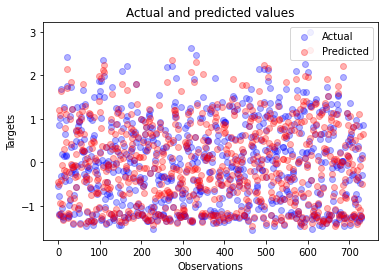

In [52]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3) #alpha is for transparency
ax.scatter(x = range(0, preds.size), y=preds, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Targets')
plt.legend() #A legend is an area describing the elements of the graph.
plt.show()

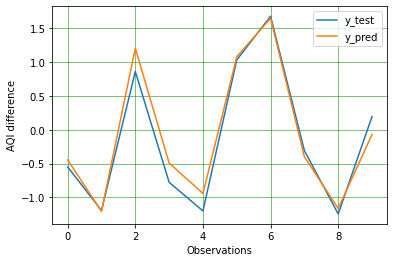

In [53]:
plt.plot(y_test.reshape(-1,1)[0:10])
plt.plot(preds.reshape(-1,1)[0:10])
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Observations')
plt.ylabel('AQI difference')
plt.gca().legend(('y_test','y_pred'))
plt.show()

C:\Users\raahi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


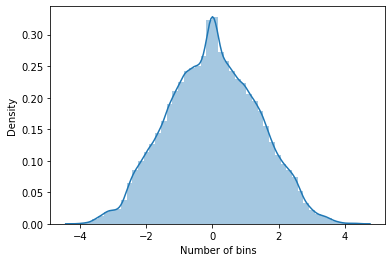

In [54]:
fig = sns.distplot(y_test-preds)
plt.xlabel("Number of bins")
plt.ylabel("Density")
plt.show(fig)

In [55]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten() #copying old array collapsed in 1D
result["PREDICTED AQI"] = preds
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["ACC OR NOT"] = np.where(abs(result["DIFFERENCE"])<= 0.5, "Accurate", "Inaccurate")
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(21)


,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,ACC OR NOT,PERCENTAGE ERROR
0,-0.549110,-0.445107,-0.104003,Accurate,-18.940365
1,-1.191437,-1.204830,0.013392,Accurate,-1.124049
2,0.859630,1.202606,-0.342976,Accurate,39.898062
3,-0.775385,-0.490354,-0.285030,Accurate,-36.759865
4,-1.198737,-0.941035,-0.257701,Accurate,-21.497751
5,1.030560,1.077769,-0.047210,Accurate,4.580995
6,1.675426,1.646096,0.029330,Accurate,1.750584
7,-0.308237,-0.399727,0.091490,Accurate,-29.681621
8,-1.242346,-1.162994,-0.079353,Accurate,-6.387311
9,0.195405,-0.070042,0.265447,Accurate,135.844497
